<a href="https://colab.research.google.com/github/deven367/thesis/blob/main/time_series_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [54]:
ap_iliad = [218,533,686,861,1172,1367,1533,1751,1997,2152,2422,2564,2834,3006,3268,3565,3802,4003,4136,4296,4516,4744,5037]
chapman_iliad = [167,369,482,593,785,910,1020,1150,1343,1483,1718,1818,2031,2154,2337,2536,2707,2877,3000,3150,3339,3476,3768]
butler_iliad = [190,474,593,732,987,1128,1243,1392,1597,1753,1962,2075,2279,2409,2612,2850,3027,3190,3292,3437,3612,3736,3976]
lang_iliad = [157,419,541,679,840,924,1034,1154,1295,1435,1566,1673,1900,1998,2072,2247,2368,2522,2638,2773,2931,3070,3285]

In [55]:
prev = 0
for i in range(len(ap_iliad)):
    st = 0
    if i > 0:
        st = ap_iliad[i-1]
    print('Book', i + 1 , ': start', st, 'end', ap_iliad[i], 'length:', ap_iliad[i] - st)

Book 1 : start 0 end 218 length: 218
Book 2 : start 218 end 533 length: 315
Book 3 : start 533 end 686 length: 153
Book 4 : start 686 end 861 length: 175
Book 5 : start 861 end 1172 length: 311
Book 6 : start 1172 end 1367 length: 195
Book 7 : start 1367 end 1533 length: 166
Book 8 : start 1533 end 1751 length: 218
Book 9 : start 1751 end 1997 length: 246
Book 10 : start 1997 end 2152 length: 155
Book 11 : start 2152 end 2422 length: 270
Book 12 : start 2422 end 2564 length: 142
Book 13 : start 2564 end 2834 length: 270
Book 14 : start 2834 end 3006 length: 172
Book 15 : start 3006 end 3268 length: 262
Book 16 : start 3268 end 3565 length: 297
Book 17 : start 3565 end 3802 length: 237
Book 18 : start 3802 end 4003 length: 201
Book 19 : start 4003 end 4136 length: 133
Book 20 : start 4136 end 4296 length: 160
Book 21 : start 4296 end 4516 length: 220
Book 22 : start 4516 end 4744 length: 228
Book 23 : start 4744 end 5037 length: 293


In [56]:
ap_ody = [150,311,496,729,907,1014,1144,1283,1464,1689,1903,2098,2267,2437,3586,2744,2947,3078,3238,3355,3503,3632,3750]
bl_ody = [142,277,446,701,863,973,1078,1242,1419,1613,1796,1943,2083,2254,2445,2594,2771,2907,3073,3198,3325,3440,3550]
wc_ody = [190,358,548,897,1086,1223,1352,1582,1808,2056,2314,2481,2656,2849,3086,3295,3580,3765,4032,4210,4385,4577,4727]
bt_ody = [1,111,223,367,589,718,818,902,1057,1206,1352,1501,1612,1721,1858,2007,2139,2296,2410,2552,2648,2756,2882,2987]

In [57]:
embedding_path = '../3.30embed/d2/alex pope iliad_cleaned_dcltr_base.npy'

In [58]:
embeddings = np.load(embedding_path)

In [59]:
embeddings.shape

(5335, 768)

In [60]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

In [61]:
successive_ap = []
for i in range(len(embeddings) - 1):
    successive_ap.append(cos_sim(embeddings[i], embeddings[i+1]))

In [62]:
def successive_similarities(embeddings):
    successive_ap = []
    for i in range(len(embeddings) - 1):
        successive_ap.append(cos_sim(embeddings[i], embeddings[i+1]))
    return successive_ap
    

In [63]:
def time_series(successive, breakpoints, fname = None):
    st = 0
#     figures = []
    for i in range(len(breakpoints)):
        plt.figure()
        plt.ylim(-1,1)
        if i > 0:
            st = breakpoints[i-1]
        x = [j for j in range(breakpoints[i] - st)]
        if i == 0:
            y = successive[:breakpoints[i]]
        else:
            y = successive[breakpoints[i-1] : breakpoints[i]]
        # print(len(x), len(y))
        # print(y)
        plt.xlabel('Book %d'  %(i+1))
        plt.plot(x, y)
#         figures.append(((plt.figure(), plt.get_fignums())))
#         plt.clf()
        # plt.savefig(fname[:-7] + 'Book %d time series'  %(i+1) +'.png', dpi = 300)
    
    plt.figure()
    plt.ylim(-1,1)
    temp = len(successive[breakpoints[-1]:])
    x = [j for j in range(temp)]
    y = successive[breakpoints[-1]:]
    # print(len(x), len(y))
    plt.xlabel('Book %d'  %(i+2))
    plt.plot(x, y)
#     figures.append(((plt.figure(), plt.get_fignums())))
    
    return list(map(plt.figure, plt.get_fignums()))
#     return figures
#     plt.clf()
    # plt.savefig(fname[:-7] + 'Book %d time series'  %(i+2) +'.png', dpi = 300)

# plt.figure(figsize=(10,10))
# # plt.scatter(l[:227], successive[:227])
# plt.plot(l[:227], successive_ap[:227])
# plt.plot([227,0],[0,0], c = 'black')

In [64]:
def time_series_v2(successive, breakpoints, fname = None):
    st = 0
    plt_values = []
    for i in range(len(breakpoints)):
#         plt.figure()
#         plt.ylim(-1,1)
        if i > 0:
            st = breakpoints[i-1]
        x = [j for j in range(breakpoints[i] - st)]
        if i == 0:
            y = successive[:breakpoints[i]]
        else:
            y = successive[breakpoints[i-1] : breakpoints[i]]
            
        plt_values.append([x,y])
        # print(len(x), len(y))
        # print(y)
#         plt.xlabel('Book %d'  %(i+1))
#         plt.plot(x, y)
#         figures.append(((plt.figure(), plt.get_fignums())))
#         plt.clf()
        # plt.savefig(fname[:-7] + 'Book %d time series'  %(i+1) +'.png', dpi = 300)
    
#     plt.figure()
#     plt.ylim(-1,1)
    temp = len(successive[breakpoints[-1]:])
    x = [j for j in range(temp)]
    y = successive[breakpoints[-1]:]
    plt_values.append([x,y])
    
    return plt_values
    # print(len(x), len(y))
#     plt.xlabel('Book %d'  %(i+2))
#     plt.plot(x, y)
#     figures.append(((plt.figure(), plt.get_fignums())))
    
#     return list(map(plt.figure, plt.get_fignums()))
#     return figures
#     plt.clf()
    # plt.savefig(fname[:-7] + 'Book %d time series'  %(i+2) +'.png', dpi = 300)

# plt.figure(figsize=(10,10))
# # plt.scatter(l[:227], successive[:227])
# plt.plot(l[:227], successive_ap[:227])
# plt.plot([227,0],[0,0], c = 'black')

In [65]:
y = successive_ap
x = [i for i in range(len(successive_ap))]
# plt.ylim(-1, 1)

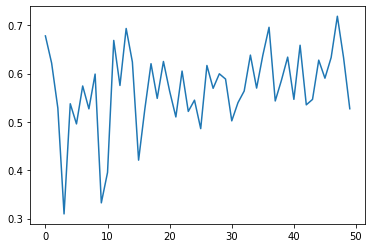

In [66]:
plt.plot(x[:50],y[:50])

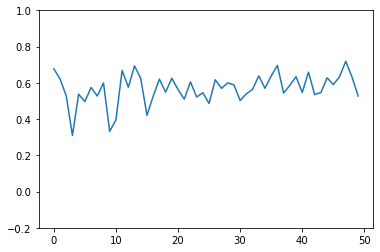

In [67]:
plt.ylim(-0.2,1)
sns.lineplot(x = x[:50] , y = y[:50])

In [68]:
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0

In [69]:
def create_ts_phase(embeddings, fname):
    successive = []
    for i in range(len(embeddings) - 1):
        successive.append(cos_sim(embeddings[i], embeddings[i+1]))

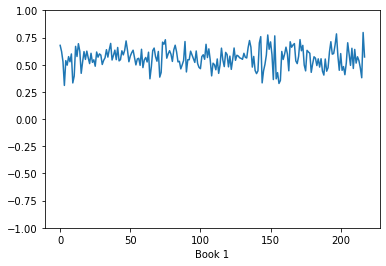

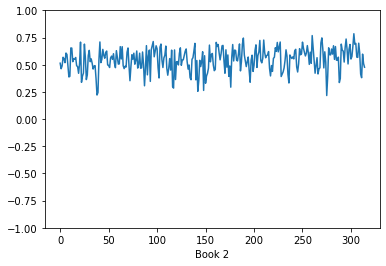

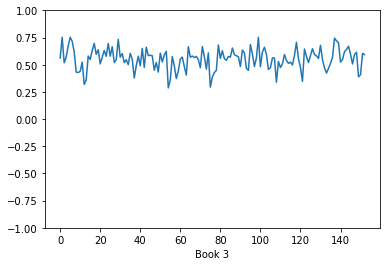

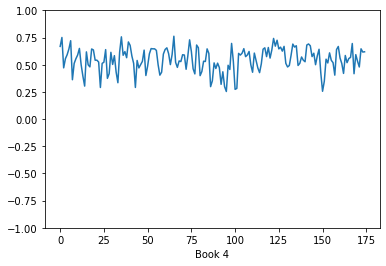

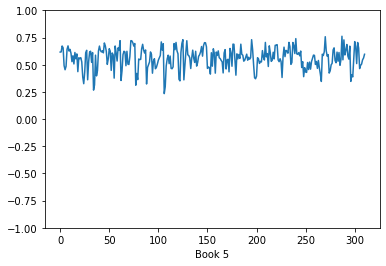

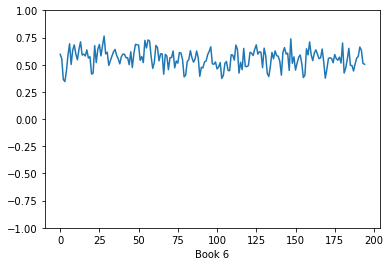

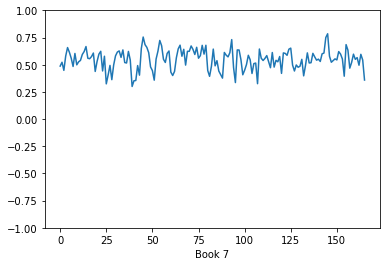

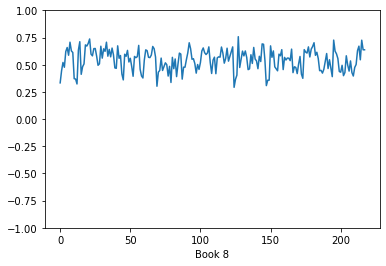

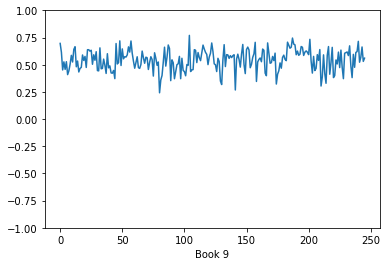

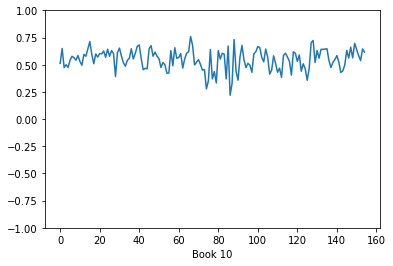

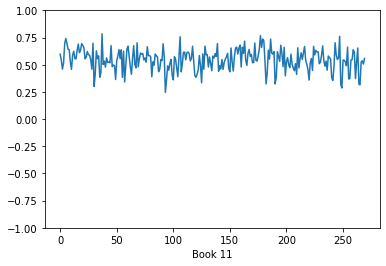

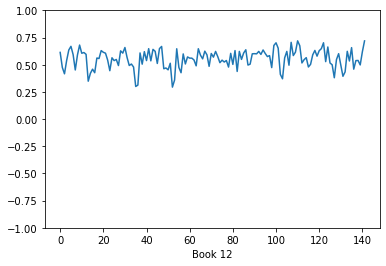

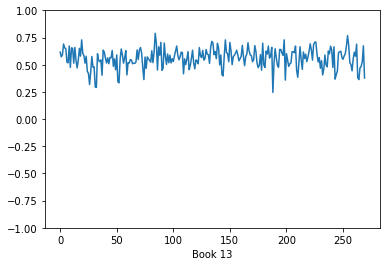

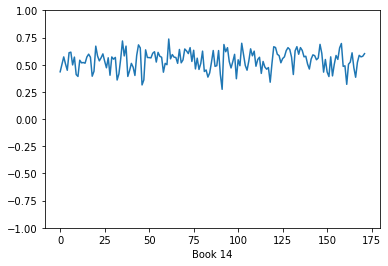

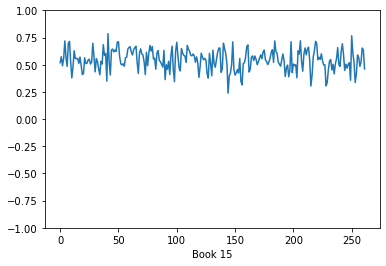

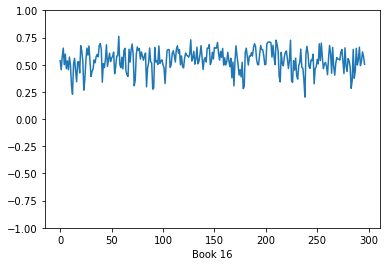

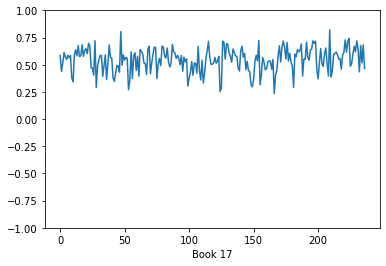

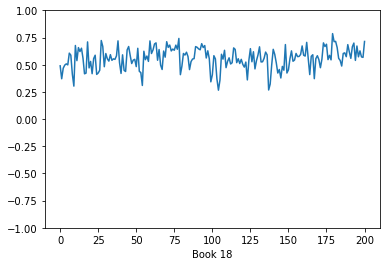

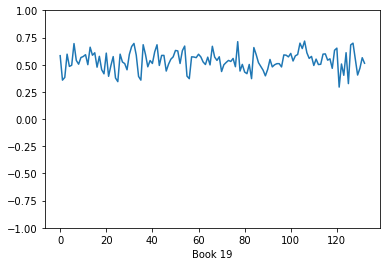

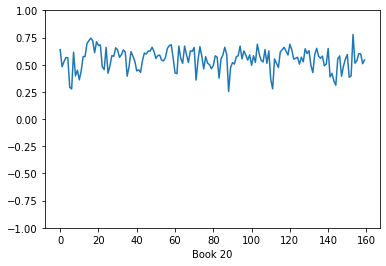

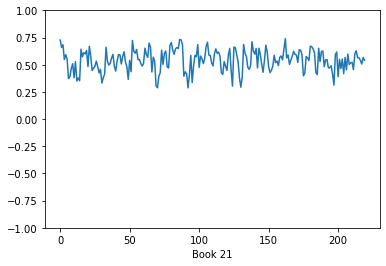

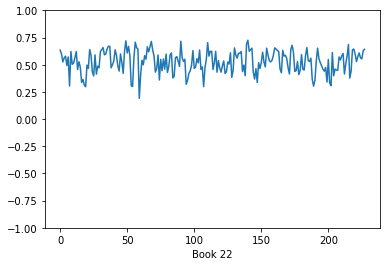

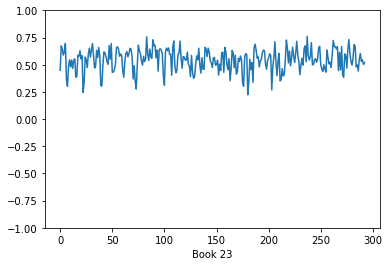

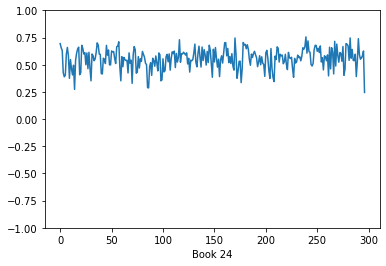

In [70]:
figs = time_series(successive_ap, ap_iliad)

In [71]:
fig2 = time_series_v2(successive_ap, ap_iliad)

In [72]:
for fig in fig2:
    print(len(fig[0]), len(fig[1]))

218 218
315 315
153 153
175 175
311 311
195 195
166 166
218 218
246 246
155 155
270 270
142 142
270 270
172 172
262 262
297 297
237 237
201 201
133 133
160 160
220 220
228 228
293 293
297 297


In [73]:
x = np.arange(50)
y = np.random.random(50)

In [74]:
x.shape, y.shape

((50,), (50,))

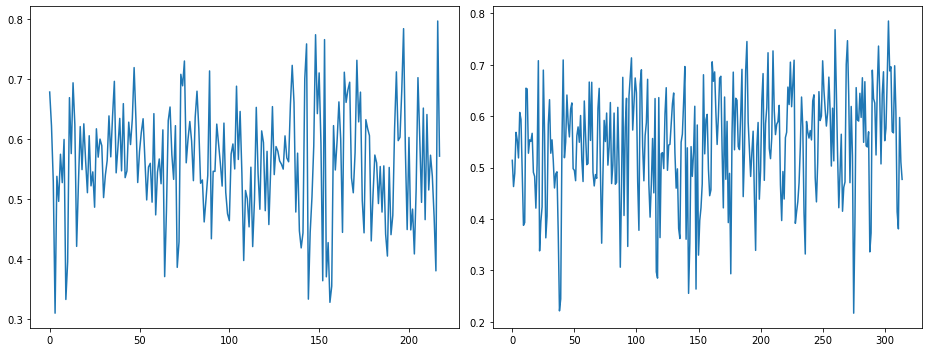

In [75]:
fig, axes = plt.subplots(1,2, figsize = (13,5))
for i,current_axis in enumerate(axes):
    x = fig2[i][0]
#     print(type(x))
    y = fig2[i][1]
#     print(type(fig2))
    current_axis.plot(x, y)
#     current_axis.plot(x, y)
plt.tight_layout()

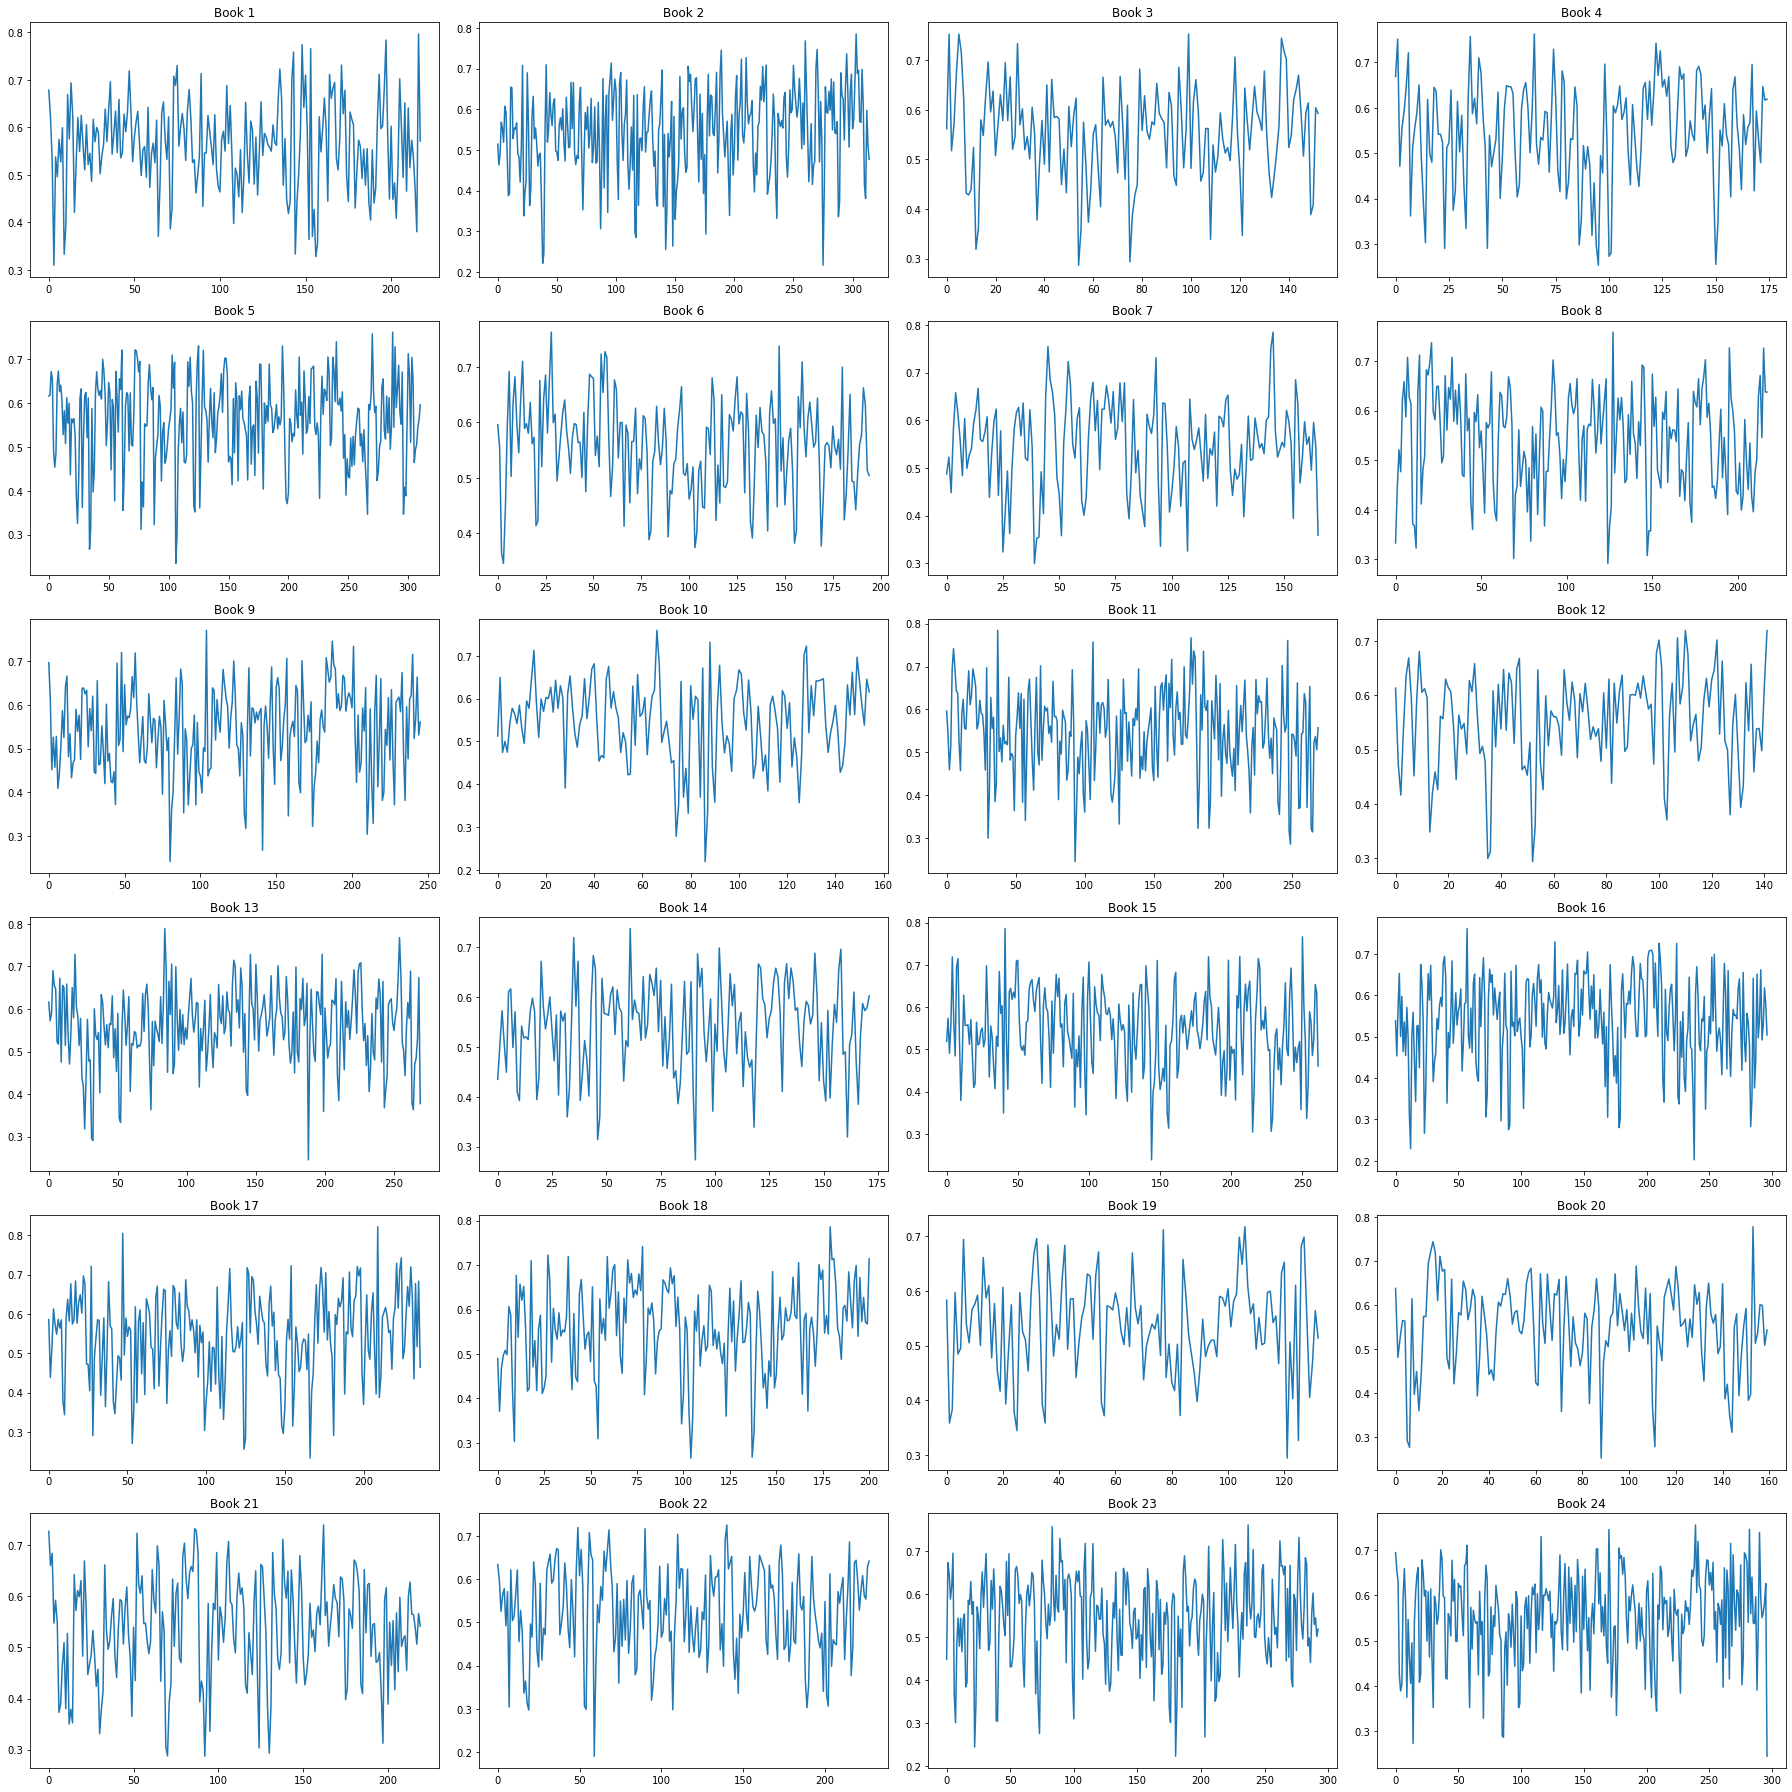

In [76]:
row = 6
col = 4
fig, axes = plt.subplots(row, col, figsize=(25,25))
# plt.figure(figsize = (10,3))
k = 0
for i in range(row):
    for j in range(col):
        x = fig2[k][0]
        y = fig2[k][1]    

        axes[i, j].plot(x, y)
        axes[i, j].set_title('Book %d' %(k+1))
#         axes[i, j].set_xlabel('Sentences')
#         axes[i, j].set_ylabel('Similarity')
        k += 1


plt.tight_layout()
plt.savefig('amazing.png', dpi = 300)

### Same Embedding method, Diff author

In [77]:
embed_path1 = '../3.30embed/d2/alex pope iliad_cleaned_dcltr_base.npy'
embed_path2 = '../3.30embed/d2/george chapman iliad_cleaned_dcltr_base.npy'
embed_path3 = '../3.30embed/d2/lang et al iliad_cleaned_dcltr_base.npy'
embed_path4 = '../3.30embed/d2/sam butler iliad_cleaned_dcltr_base.npy'

In [78]:
embed1 = np.load(embed_path1)
embed2 = np.load(embed_path2)
embed3 = np.load(embed_path3)
embed4 = np.load(embed_path4)

In [79]:
ts1 = time_series_v2(successive_similarities(embed1), ap_iliad)
ts2 = time_series_v2(successive_similarities(embed2), chapman_iliad)
ts3 = time_series_v2(successive_similarities(embed3), lang_iliad)
ts4 = time_series_v2(successive_similarities(embed4), butler_iliad)

In [80]:
(ts1[0][1])

[0.67807215,
 0.62177145,
 0.52871996,
 0.30956876,
 0.537646,
 0.49590734,
 0.5744255,
 0.52710766,
 0.5990517,
 0.33245695,
 0.3953807,
 0.668739,
 0.57550013,
 0.6934725,
 0.62410367,
 0.4208904,
 0.52615094,
 0.62056047,
 0.5488039,
 0.62513644,
 0.56359506,
 0.5103457,
 0.60526663,
 0.52176803,
 0.5450752,
 0.48613444,
 0.61684495,
 0.5696109,
 0.5996568,
 0.58874756,
 0.50222844,
 0.5398785,
 0.56399226,
 0.6383447,
 0.57008076,
 0.6379467,
 0.69594073,
 0.5434266,
 0.58639365,
 0.6341665,
 0.54678375,
 0.6587493,
 0.5354387,
 0.5466157,
 0.6278925,
 0.59055495,
 0.6333534,
 0.7188056,
 0.63305277,
 0.5273175,
 0.5789363,
 0.610842,
 0.6335812,
 0.56792253,
 0.49826953,
 0.5531494,
 0.5592848,
 0.4945666,
 0.6420858,
 0.4733623,
 0.54461884,
 0.56656575,
 0.5252795,
 0.61505246,
 0.37048507,
 0.48097283,
 0.6305813,
 0.6531459,
 0.57390845,
 0.53258246,
 0.6220438,
 0.38592973,
 0.42869896,
 0.7076219,
 0.68847686,
 0.729804,
 0.5601617,
 0.59930456,
 0.62904024,
 0.596483,
 0.53

Text(0.5, 1.0, 'Iliad by Butler Book 1')

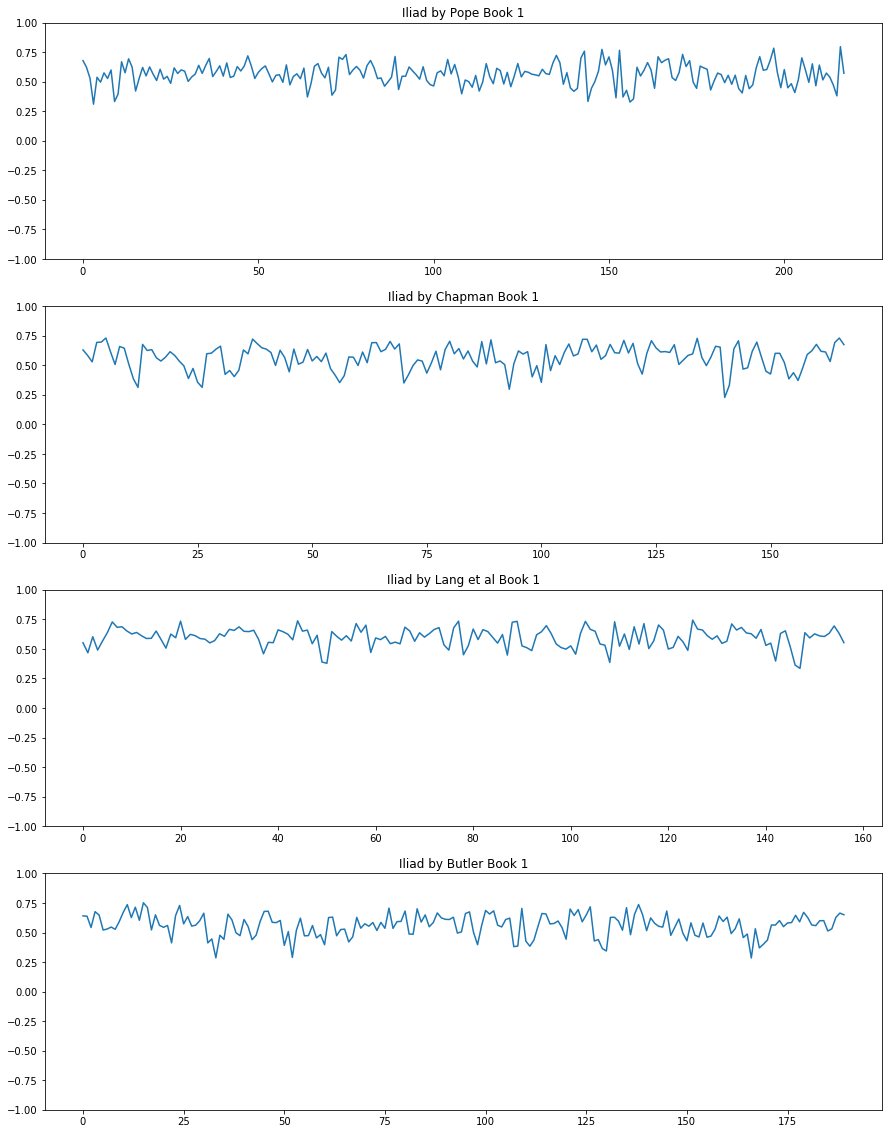

In [81]:
fig, axes = plt.subplots(4,1, figsize = (15, 20))
# fig.title('Declutr-base')
axes[0].plot(ts1[0][0], ts1[0][1])
axes[0].set_ylim([-1, 1])
axes[0].set_title('Iliad by Pope Book 1')
axes[1].plot(ts2[0][0], ts2[0][1])
axes[1].set_ylim([-1, 1])
axes[1].set_title('Iliad by Chapman Book 1')
axes[2].plot(ts3[0][0], ts3[0][1])
axes[2].set_ylim([-1, 1])
axes[2].set_title('Iliad by Lang et al Book 1')
axes[3].plot(ts4[0][0], ts4[0][1])
axes[3].set_ylim([-1, 1])
axes[3].set_title('Iliad by Butler Book 1')
# plt.savefig('Same Book Diff Auth.png', dpi = 300)

### Same author Different embedding method

In [82]:
embed_method1 = '../3.30embed/d2/alex pope iliad_cleaned_dcltr_base.npy'
embed_method2 = '../3.30embed/d2/alex pope iliad_cleaned_dcltr_sm.npy'
embed_method3 = '../3.30embed/distil/alex pope iliad_cleaned_distil.npy'
embed_method4 = '../3.30embed/roberta/alex pope iliad_cleaned_roberta.npy'
embed_method5 = '../3.30embed/use2/alex pope iliad_cleaned_use.npy'
embed_method6 = '../3.30embed/alex pope iliad__if_glove.npy'
embed_method7 = '../3.30embed/alex pope iliad__if_FT.npy'

In [83]:
embed_sa_de1 = np.load(embed_method1)
embed_sa_de2 = np.load(embed_method2)
embed_sa_de3 = np.load(embed_method3)
embed_sa_de4 = np.load(embed_method4)
embed_sa_de5 = np.load(embed_method5)
embed_sa_de6 = np.load(embed_method6)
embed_sa_de7 = np.load(embed_method7)

In [84]:
ts_sa_de1 = time_series_v2(successive_similarities(embed_sa_de1), ap_iliad)
ts_sa_de2 = time_series_v2(successive_similarities(embed_sa_de2), ap_iliad)
ts_sa_de3 = time_series_v2(successive_similarities(embed_sa_de3), ap_iliad)
ts_sa_de4 = time_series_v2(successive_similarities(embed_sa_de4), ap_iliad)
ts_sa_de5 = time_series_v2(successive_similarities(embed_sa_de5), ap_iliad)
ts_sa_de6 = time_series_v2(successive_similarities(embed_sa_de6), ap_iliad)
ts_sa_de7 = time_series_v2(successive_similarities(embed_sa_de7), ap_iliad)

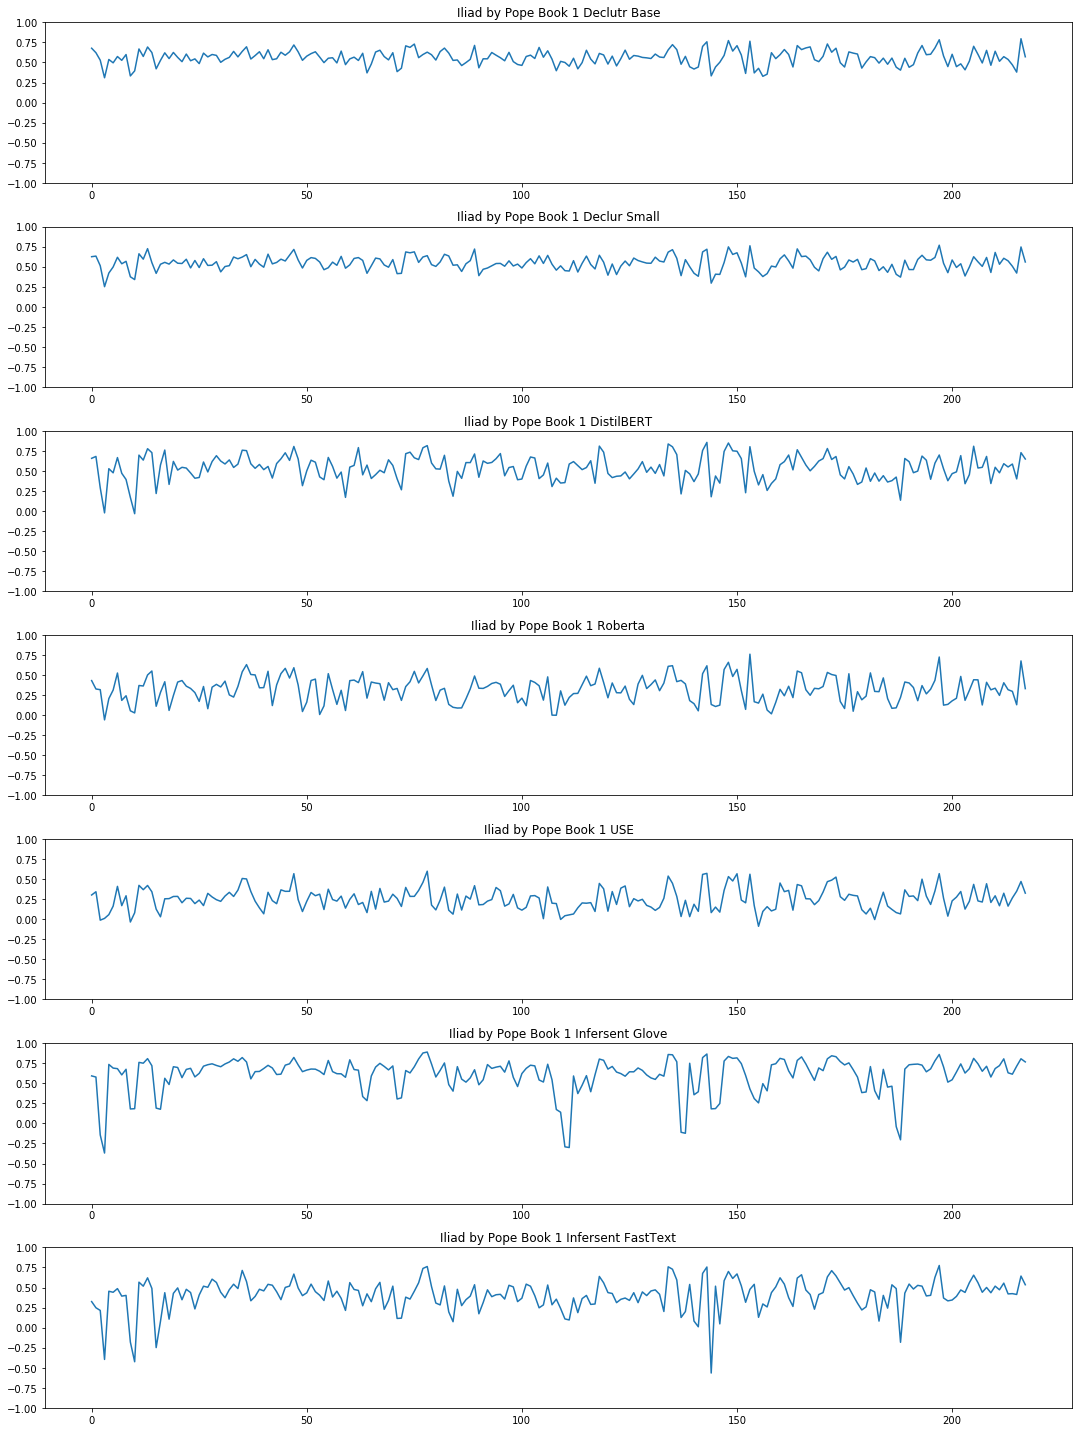

In [85]:
fig, axes = plt.subplots(7,1, figsize = (15, 20))
# fig.title('Declutr-base')
axes[0].plot(ts_sa_de1[0][0], ts_sa_de1[0][1])
axes[0].set_ylim([-1, 1])
axes[0].set_title('Iliad by Pope Book 1 Declutr Base')

axes[1].plot(ts_sa_de2[0][0], ts_sa_de2[0][1])
axes[1].set_ylim([-1, 1])
axes[1].set_title('Iliad by Pope Book 1 Declur Small')

axes[2].plot(ts_sa_de3[0][0], ts_sa_de3[0][1])
axes[2].set_ylim([-1, 1])
axes[2].set_title('Iliad by Pope Book 1 DistilBERT')

axes[3].plot(ts_sa_de4[0][0], ts_sa_de4[0][1])
axes[3].set_ylim([-1, 1])
axes[3].set_title('Iliad by Pope Book 1 Roberta')

axes[4].plot(ts_sa_de5[0][0], ts_sa_de5[0][1])
axes[4].set_ylim([-1, 1])
axes[4].set_title('Iliad by Pope Book 1 USE')

axes[5].plot(ts_sa_de6[0][0], ts_sa_de6[0][1])
axes[5].set_ylim([-1, 1])
axes[5].set_title('Iliad by Pope Book 1 Infersent Glove')

axes[6].plot(ts_sa_de7[0][0], ts_sa_de7[0][1])
axes[6].set_ylim([-1, 1])
axes[6].set_title('Iliad by Pope Book 1 Infersent FastText')

plt.tight_layout()
# plt.savefig('Same Book Same Auth Diff embed method.png', dpi = 300)

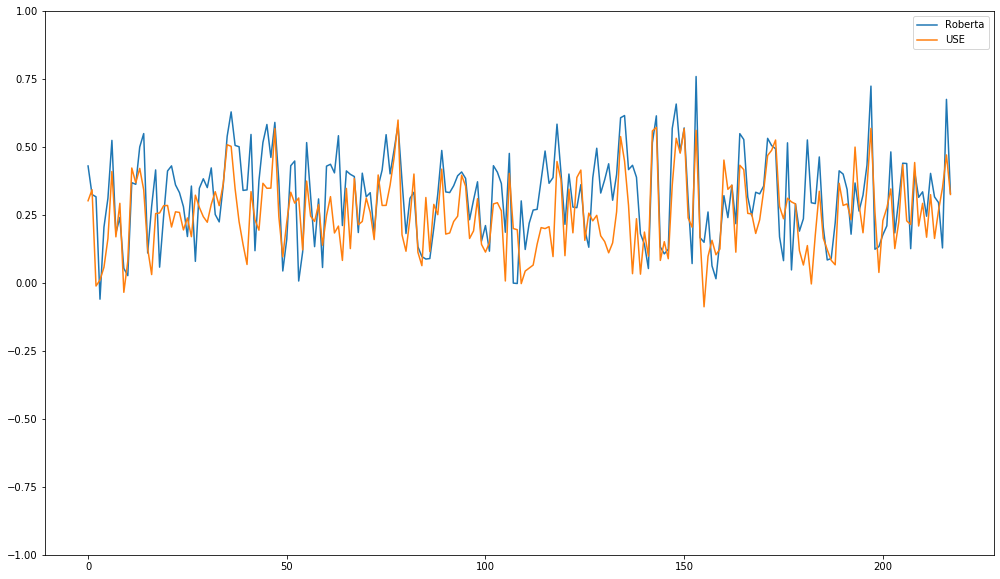

In [86]:
plt.figure(figsize = (17,10))
plt.ylim(-1,1)
# plt.plot(ts_sa_de1[0][0], ts_sa_de1[0][1], label = 'Declutr Base' )
# plt.plot(ts_sa_de2[0][0], ts_sa_de2[0][1], label = 'Declur Small' )
# plt.plot(ts_sa_de3[0][0], ts_sa_de3[0][1], label = 'DistilBERT' )
plt.plot(ts_sa_de4[0][0], ts_sa_de4[0][1], label = 'Roberta')
plt.plot(ts_sa_de5[0][0], ts_sa_de5[0][1], label =  'USE',)
# plt.plot(ts_sa_de6[0][0], ts_sa_de6[0][1], label = 'InferSent Glove')
# plt.plot(ts_sa_de7[0][0], ts_sa_de7[0][1], label = 'InferSent FastText')
plt.legend()

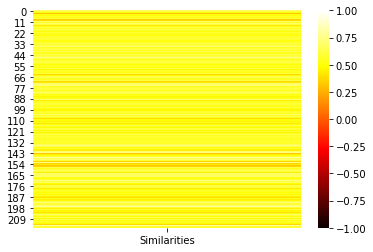

In [87]:
df = pd.DataFrame({"Similarities": fig2[0][1]}, index=[i for i in range(len(fig2[0][1]))])
sns.heatmap(df, cmap = 'hot', vmin = -1, vmax = 1,)
# sns.heatmap([fig2[0][1]], cmap = 'hot', vmin = -1, vmax = 1)

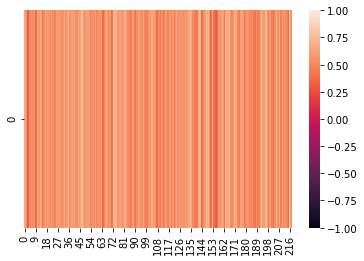

In [88]:
sns.heatmap([fig2[0][1]], vmin = -1, vmax = 1)

In [89]:
data_dict = {
    'Book 1 Pope Declutr base': ts_sa_de1[0][1],
    'Book 1 Pope Declutr sm': ts_sa_de2[0][1],
    'Book 1 Pope DistilBERT': ts_sa_de3[0][1],
    'Book 1 Pope RoBERTa': ts_sa_de4[0][1],
    'Book 1 Pope USE': ts_sa_de5[0][1],
    'Book 1 Pope InferSent GloVe': ts_sa_de6[0][1],
    'Book 1 Pope InferSent FastText': ts_sa_de7[0][1],
}

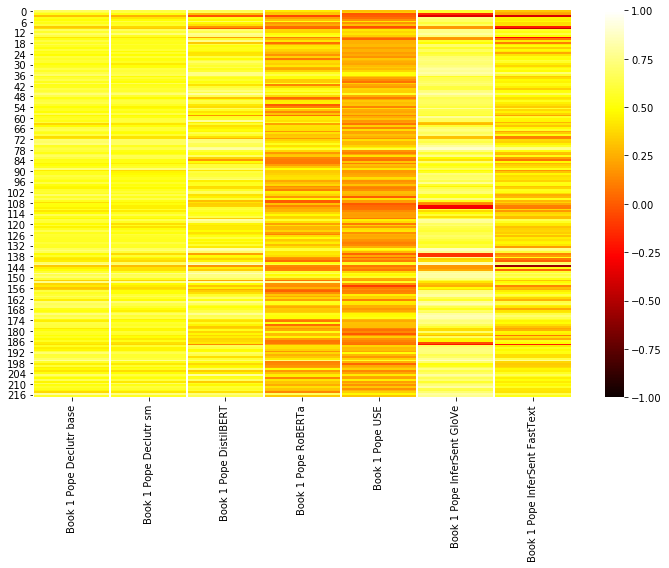

In [90]:

df = pd.DataFrame(data_dict)
plt.figure(figsize = (10,8))
ax = sns.heatmap(df, cmap = 'hot', vmin = -1, vmax = 1)
for i in range(len(data_dict.keys())):
    ax.axvline(i, color='white', lw=2)
plt.tight_layout()
plt.savefig('1xN plot.png', dpi = 300)

In [91]:
list(data_dict.values())

[[0.67807215,
  0.62177145,
  0.52871996,
  0.30956876,
  0.537646,
  0.49590734,
  0.5744255,
  0.52710766,
  0.5990517,
  0.33245695,
  0.3953807,
  0.668739,
  0.57550013,
  0.6934725,
  0.62410367,
  0.4208904,
  0.52615094,
  0.62056047,
  0.5488039,
  0.62513644,
  0.56359506,
  0.5103457,
  0.60526663,
  0.52176803,
  0.5450752,
  0.48613444,
  0.61684495,
  0.5696109,
  0.5996568,
  0.58874756,
  0.50222844,
  0.5398785,
  0.56399226,
  0.6383447,
  0.57008076,
  0.6379467,
  0.69594073,
  0.5434266,
  0.58639365,
  0.6341665,
  0.54678375,
  0.6587493,
  0.5354387,
  0.5466157,
  0.6278925,
  0.59055495,
  0.6333534,
  0.7188056,
  0.63305277,
  0.5273175,
  0.5789363,
  0.610842,
  0.6335812,
  0.56792253,
  0.49826953,
  0.5531494,
  0.5592848,
  0.4945666,
  0.6420858,
  0.4733623,
  0.54461884,
  0.56656575,
  0.5252795,
  0.61505246,
  0.37048507,
  0.48097283,
  0.6305813,
  0.6531459,
  0.57390845,
  0.53258246,
  0.6220438,
  0.38592973,
  0.42869896,
  0.7076219,
  0.

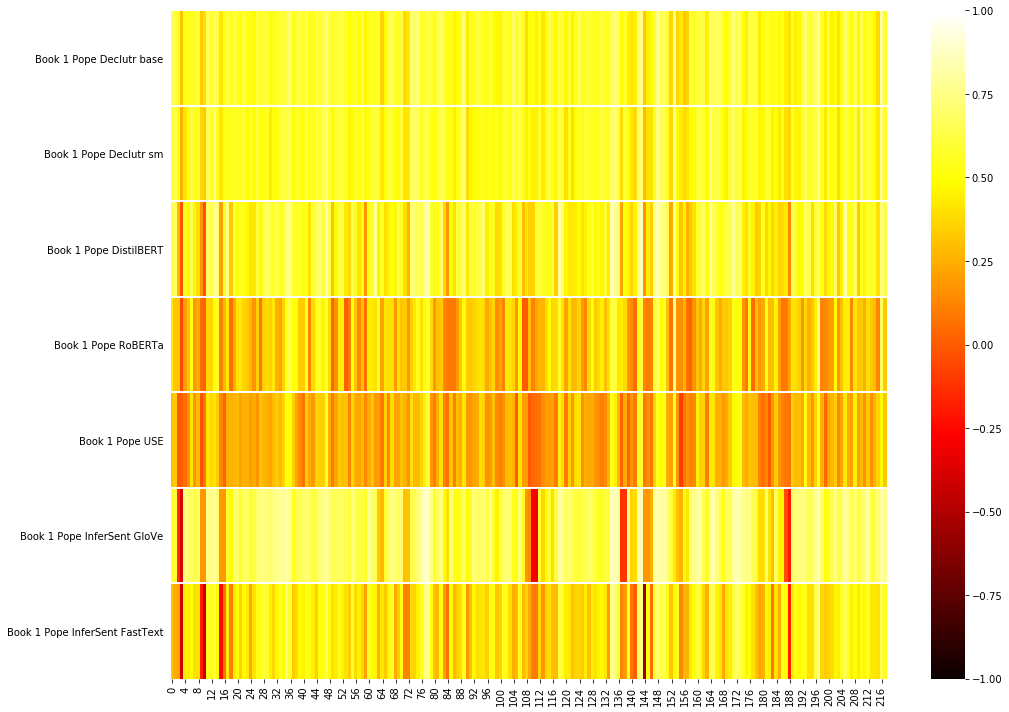

In [92]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(list(data_dict.values()), yticklabels = list(data_dict.keys()), cmap = 'hot', vmin = -1, vmax = 1)
ax.tick_params(left=False)
cbar = ax.collections[0].colorbar

for i in range(len(data_dict.keys())):
    ax.axhline(i, color='white', lw=2)
plt.tight_layout()
plt.savefig('11.png', dpi = 300)

SyntaxError: invalid syntax (<ipython-input-93-7454d3e44e73>, line 1)

In [100]:
def n_windows_avg(series, size):
    ln = len(series)
    new = []
    for i in range(ln - size):
        window = series[i: i + size]
        new.append(np.mean(window))
    
    return new
        
    

In [101]:
n_windows_avg([1,2,3,4,5,6,7,8,9,10], 3)

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [94]:
def phase_plots(successive, breakpoints, fname = None):
    st = 0
    for i in range(len(breakpoints)):
        fig = plt.figure()
#         plt.ylim(0,1)
        if i == 0:
            x = successive[ : breakpoints[i] -1 ]
            y = successive[1: breakpoints[i]] 
            plt.xlabel('Book %d'  %(i+1))
            plt.plot(x, y)
        else:
            x = successive[breakpoints[i - 1] :  breakpoints[i] - 1]
            y = successive[breakpoints[i - 1] + 1: breakpoints[i]]
            plt.xlabel('Book %d'  %(i+1))
            plt.plot(x, y)
#             plt.savefig(fname[:-7] + 'Book ' + (i+1)+ 'phase.png', dpi = 300)

    
    plt.figure()
    x = successive[breakpoints[-1]: -1]
    y = successive[breakpoints[-1] + 1 :  ]
    # print(len(x), len(y))
    plt.xlabel('Book %d'  %(i+2))
#     plt.ylim(0,1)
    plt.plot(x, y)
    # plt.savefig(fname[:-7] + 'Book %d phase'  %(i+2) +'.png', dpi = 300)

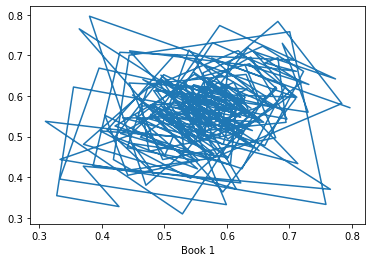

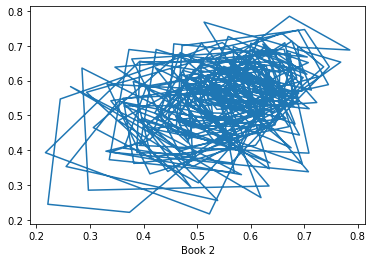

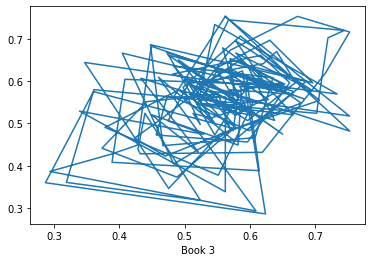

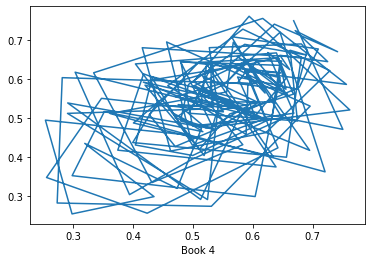

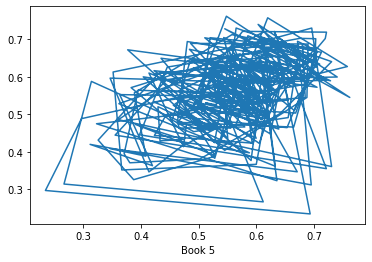

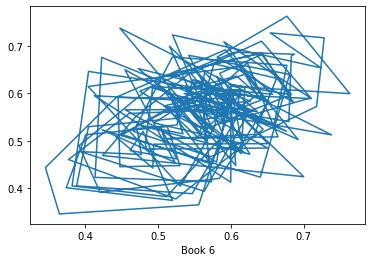

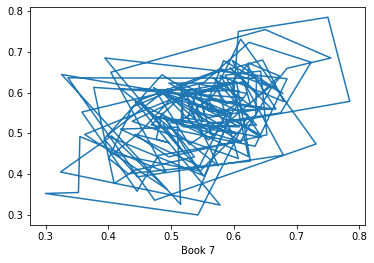

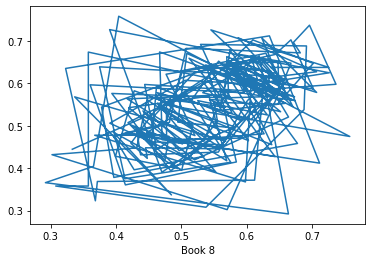

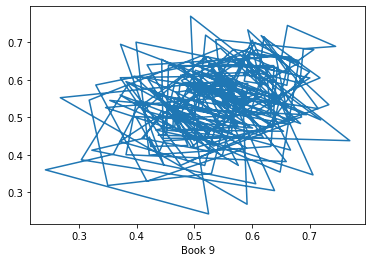

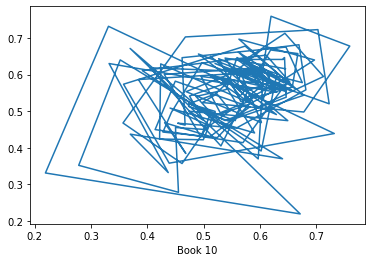

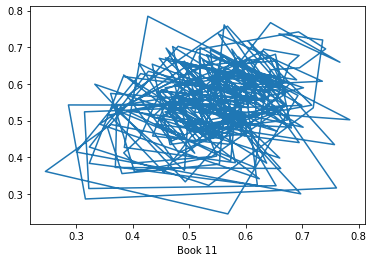

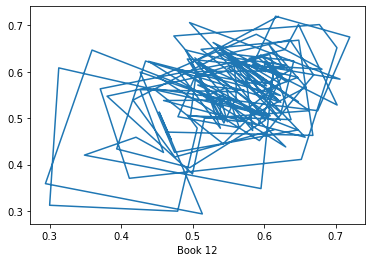

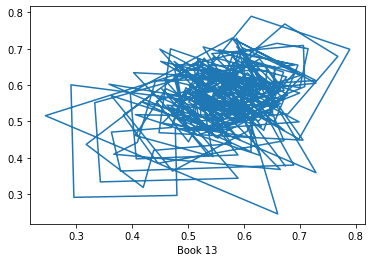

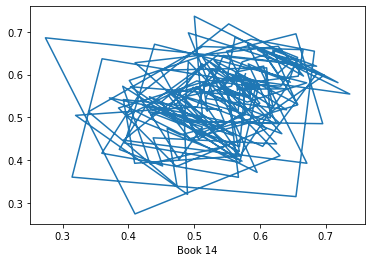

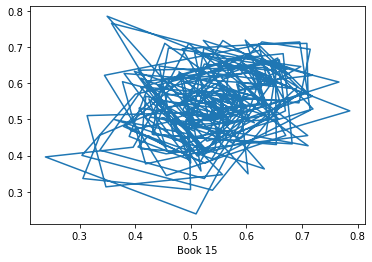

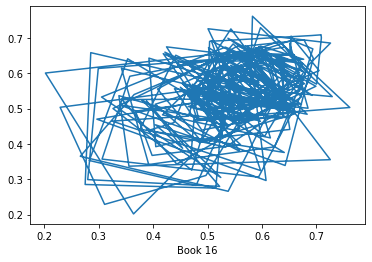

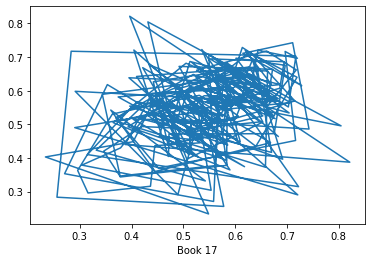

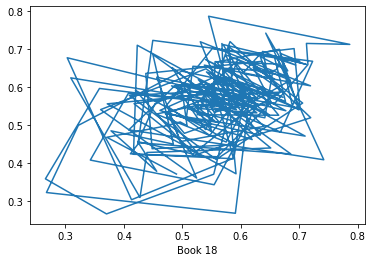

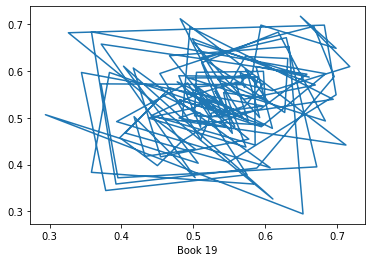

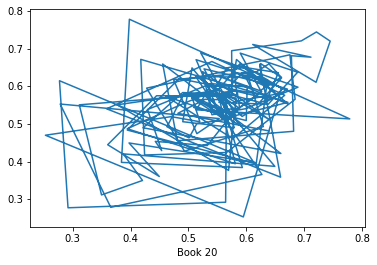

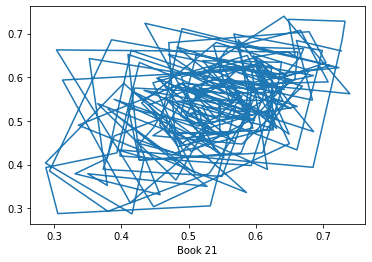

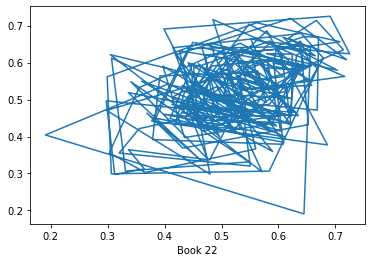

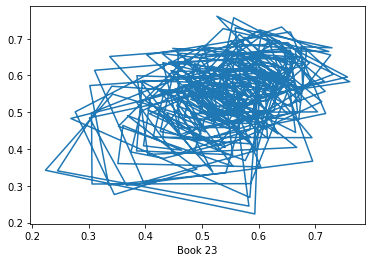

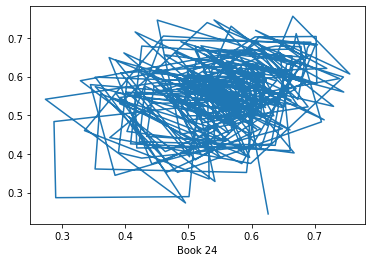

In [103]:
phase_plots(successive_ap, ap_iliad)

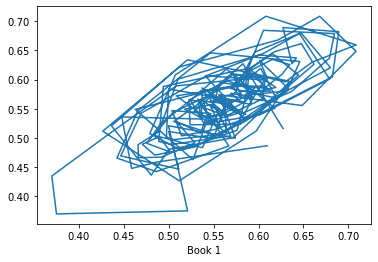

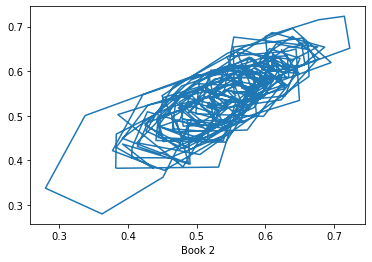

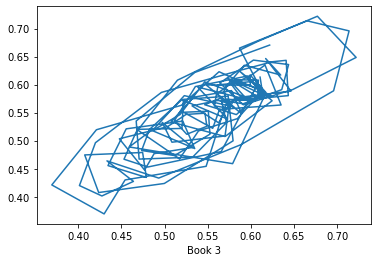

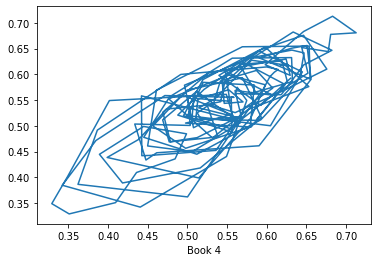

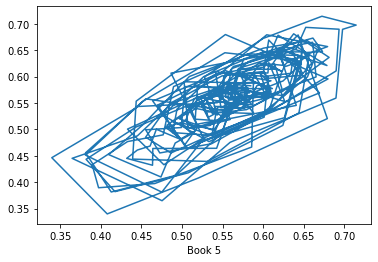

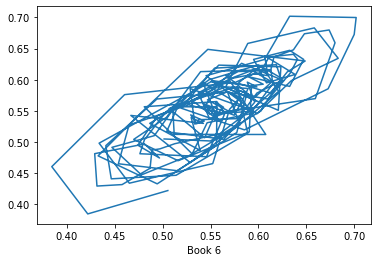

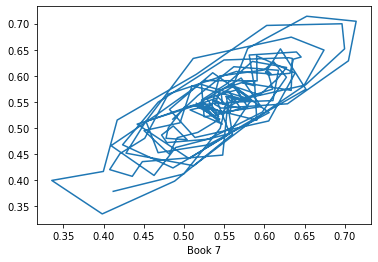

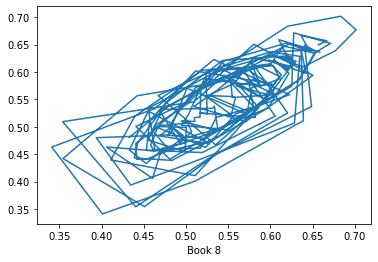

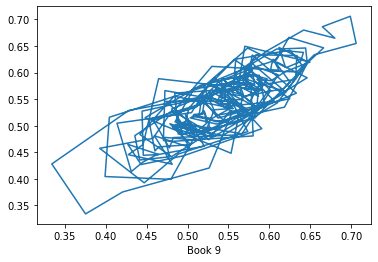

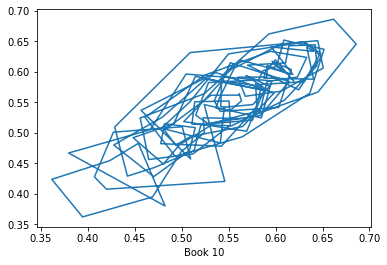

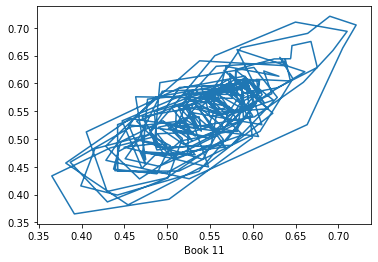

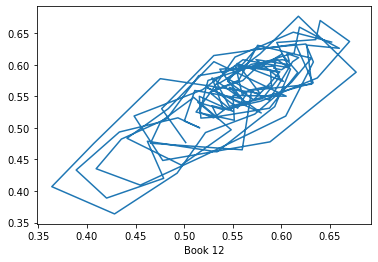

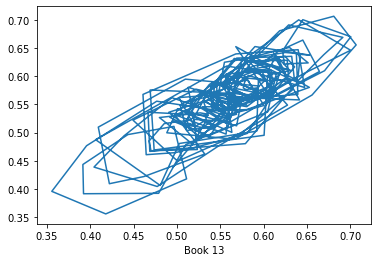

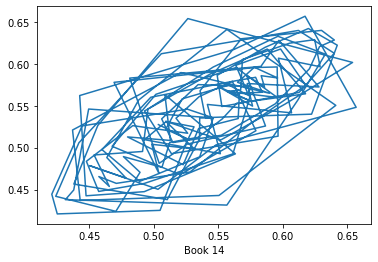

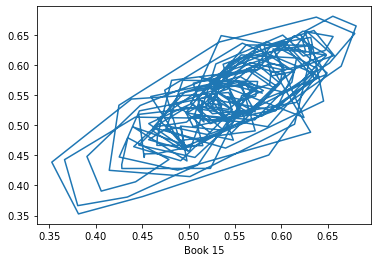

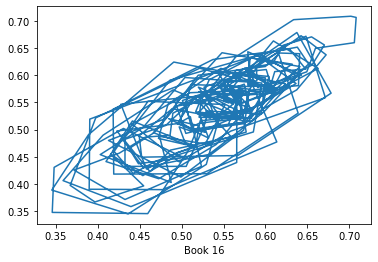

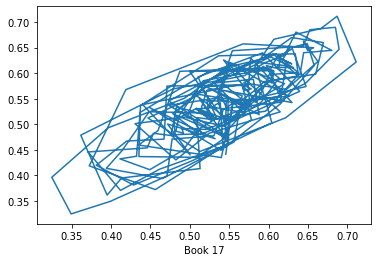

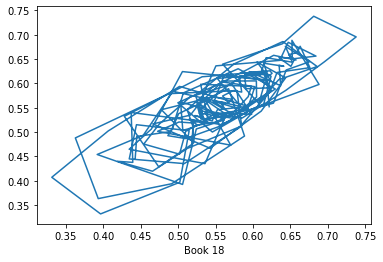

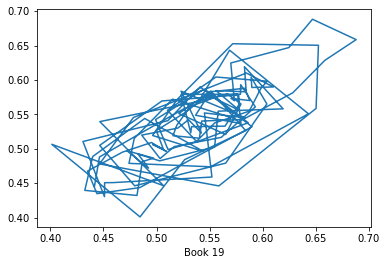

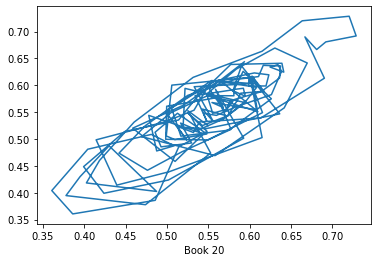

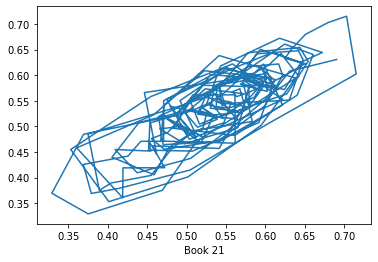

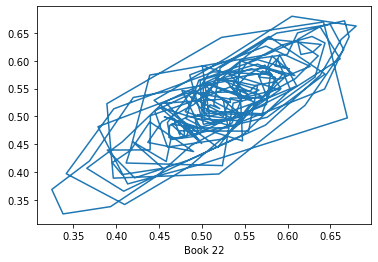

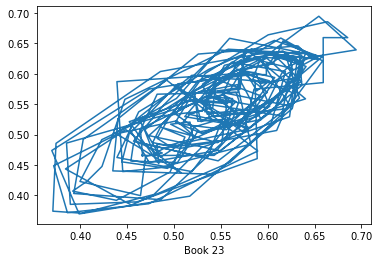

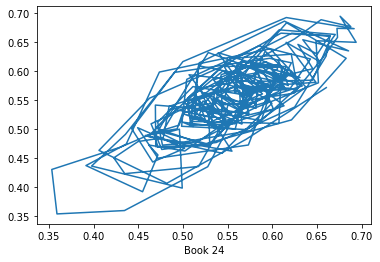

In [112]:
phase_plots(n_windows_avg(successive_ap, 3), ap_iliad)

In [ ]:
len(embeddings)
len(successive_ap)

In [ ]:
l = [i for i in range(len(successive_ap))]

In [ ]:
a = successive_ap

In [ ]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(a[:226], a[1:227])
plt.savefig('phase_plot.png', dpi = 300)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(l, columns=['x'])

In [ ]:
df['y'] = successive_ap

In [ ]:
df

In [ ]:
mat = np.matrix(df) 

In [ ]:
mat.shape

In [ ]:
mat[:,0][:200]

In [ ]:
plt.figure(figsize=(10,10))
# plt.scatter(l[:227], successive[:227])
plt.plot(l[:227], successive_ap[:227])
plt.plot([227,0],[0,0], c = 'black')

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(l[:227], successive[:227])
# plt.plot(l[:227], successive[:227])
plt.plot([227,0],[0,0], c = 'black')

In [ ]:
plt.figure(figsize=(10,10))
# sns.scatterplot(x = 'x', y = 'y', data = df[:227])
plt.plot(mat[:,0][:227], mat[:,1][:227])
plt.plot([227,0],[0,0], c = 'black')
plt.savefig('ap_iliad_book1_ts.png', dpi = 300)

In [ ]:
# book2 begins at 227
ap_iliad = embeddings

# book2 begins at 167
gc_iliad = np.load('george chapman iliad__if_glove.npy')

In [ ]:
print(cos(ap_iliad[:227], gc_iliad[:167]).shape)

In [ ]:
def plot_heatmap(embeddings, fname):
    cmp = newcmp(0,0,256)
    sns.heatmap(cosine_similarity(embeddings, embeddings) ,square=True, cmap='hot', vmin=0, vmax = 1)
    # plt.show()
    # inp = input('Do you have want to save the figure? ')
    # if inp == 'y' or inp == 'Y':
    plt.savefig(fname+'.png', dpi = 300)
    plt.clf()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cos(ap_iliad[:227], gc_iliad[:167]) ,square=True, cmap='hot', vmin=0, vmax = 1)
plt.savefig('book1_alexpope_vs_gc'+'.png', dpi = 300)

In [ ]:
ap_book1_hm = sns.heatmap(cos(ap_iliad[:227], ap_iliad[:227]) ,square=True, cmap='hot', vmin=0, vmax = 1)
plt.savefig('ap_book1_hm.png', dpi = 300)

In [ ]:
gc_book1_hm = sns.heatmap(cos(gc_iliad[:167], gc_iliad[:167]) ,square=True, cmap='hot', vmin=0, vmax = 1)
plt.savefig('gc_book1_hm.png', dpi = 300)

In [ ]:
successive_gc = []
for i in range(len(gc_iliad) - 1):
    successive_gc.append(cos_sim(gc_iliad[i], gc_iliad[i+1]))

In [ ]:
plt.figure(figsize=(10,10))
# sns.scatterplot(l[:167], successive_gc[:167])
# plt.plot(mat[:,0][:227], mat[:,1][:227])
plt.plot(l[:167], successive_gc[:167])
plt.plot([167,0],[0,0], c = 'black')
plt.savefig('gc_iliad_book1_ts.png', dpi = 300)

In [ ]:
fig2,axes2 = plt.subplots(2,1)
axes2[0].plot(l[:167], successive_gc[:167])
axes2[0].plot([167,0],[0,0], c = 'black')


axes2[1].plot(l[:227], successive_ap[:227])
axes2[1].plot([227,0],[0,0], c = 'black')
plt.tight_layout()

plt.savefig('ap_vs_gc_book1_ts.png', dpi = 300)

In [ ]:
fig,axes = plt.subplots(1,2)
axes[0].plot(sns.heatmap(cos(gc_iliad[:167], gc_iliad[:167]) ,square=True, cmap='hot', vmin=0, vmax = 1))
axes[1].plot(sns.heatmap(cos(ap_iliad[:227], ap_iliad[:227]) ,square=True, cmap='hot', vmin=0, vmax = 1))